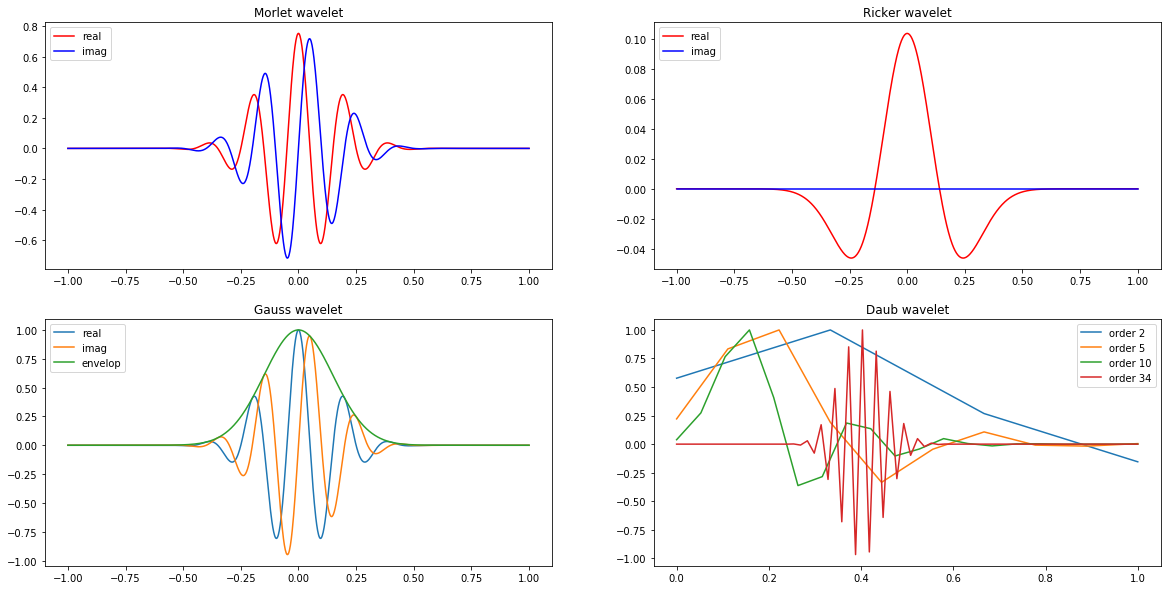

In [138]:
from scipy.signal import morlet, ricker, gausspulse, daub
import numpy as np
from matplotlib import pyplot as plt

N_SAMPLES = 1000
fig = plt.figure()
fig.set_size_inches(20, 10)

morlet_fig = fig.add_subplot(221)
morlet_sample = morlet(N_SAMPLES)
morlet_x = np.linspace(-1, 1, N_SAMPLES)
morlet_fig.plot(morlet_x, morlet_sample.real, color="red")
morlet_fig.plot(morlet_x, morlet_sample.imag, color="blue")
morlet_fig.legend(['real', 'imag'], loc='upper left')    
morlet_fig.set_title("Morlet wavelet")


ricker_fig = fig.add_subplot(222)
ricker_sample = ricker(N_SAMPLES, 70)
ricker_x = np.linspace(-1, 1, N_SAMPLES)
ricker_fig.plot(ricker_x, ricker_sample.real, color="red")
ricker_fig.plot(ricker_x, ricker_sample.imag, color="blue")
ricker_fig.legend(['real', 'imag'], loc='upper left')    
ricker_fig.set_title("Ricker wavelet")

gauss_fig = fig.add_subplot(223)
gauss_x = np.linspace(-1, 1, N_SAMPLES)
gauss_sample_r, gauss_sample_i, gauess_sample_e = gausspulse(gauss_x, fc=5, retquad=True, retenv=True)
gauss_fig.plot(gauss_x, gauss_sample_r, 
               gauss_x, gauss_sample_i, 
               gauss_x, gauess_sample_e)
gauss_fig.legend(['real', 'imag', 'envelop'], loc='upper left') 
gauss_fig.set_title('Gauss wavelet')

daub_fig = fig.add_subplot(224)
dims = [2, 5, 10, 34]
for dim in dims:
    daub_sample = daub(dim)
    daub_sample =  daub_sample/daub_sample.max()
    daub_x = np.linspace(0, 1, len(daub_sample))
    daub_fig.plot(daub_x, daub_sample)
daub_fig.legend([f'order {dim}' for dim in dims], loc='upper right')
daub_fig.set_title('Daub wavelet')
fig.savefig('wavelets.png')

plt.show()

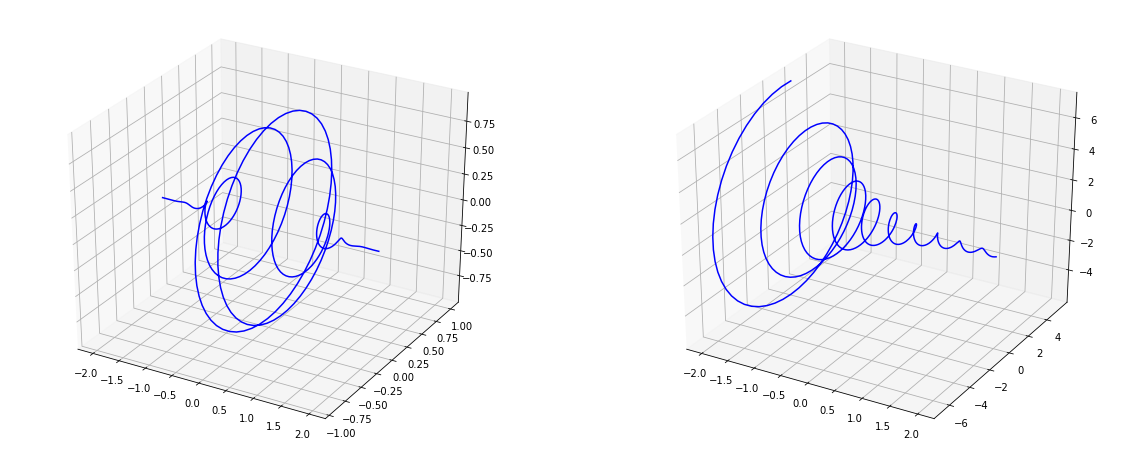

In [139]:
from scipy.signal import morlet, ricker, gausspulse, daub, gaussian
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gauss(x, mu=0, sigma=1):
    return np.exp(-((x-mu)**2/(2.0*sigma**2)))

def slop(x, off=0):
    return np.exp(off-x)

N_SAMPLES = 500
x = np.linspace(-2, 2, N_SAMPLES)
fig = plt.figure(figsize=(20, 8))
g = gauss(x, sigma=0.5)

chirp01_y = np.cos(15 * x)*g
chirp01_z = np.sin(15 * x)*g
chirp01 = fig.add_subplot(121, projection='3d')
chirp01.plot(x, chirp01_y, chirp01_z, '-b')

chirp02_y = np.cos(15 * x)*slop(x)
chirp02_z = np.sin(15 * x)*slop(x)
chirp02 = fig.add_subplot(122, projection='3d')
chirp02.plot(x, chirp02_y, chirp02_z, '-b')

fig.savefig('chirps.png')

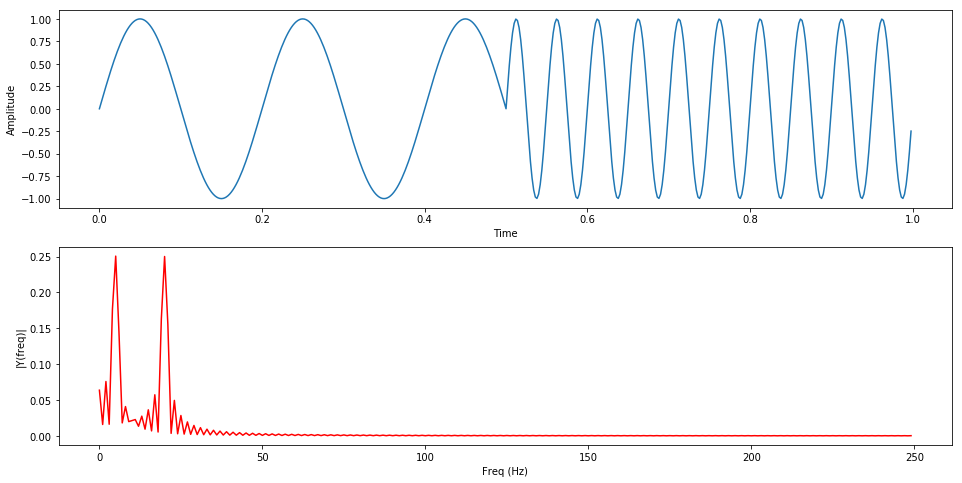

In [140]:
import matplotlib.pyplot as plt
import numpy as np
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

Fs = 500.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector

ff = 5;   # frequency of the signal
y = np.concatenate([np.sin(2*np.pi*ff*t[:len(t)//2]), 
               np.sin(8*np.pi*ff*t[:len(t)//2])])

n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(n//2)] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(n//2)]

fig, ax = plt.subplots(2, 1)
ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

fig.set_size_inches(16, 8)
fig.savefig('fft01.png')
plt.show()

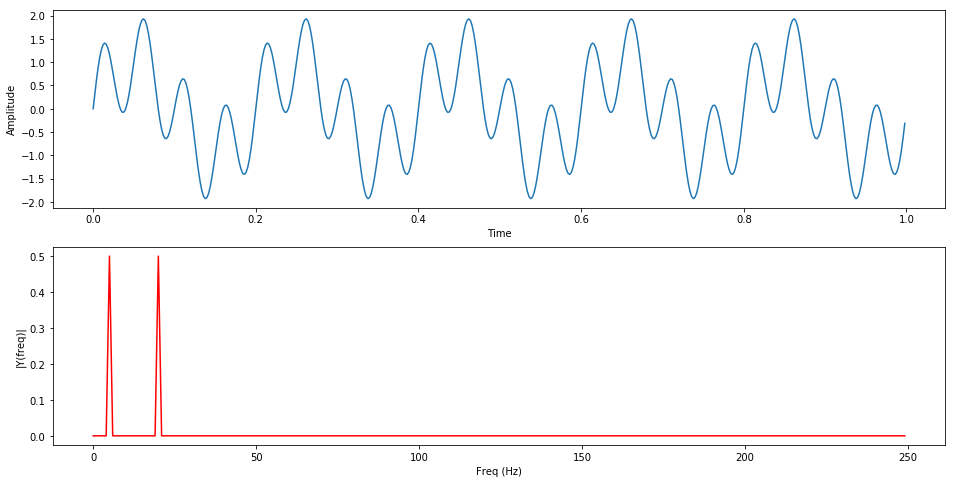

In [141]:
import matplotlib.pyplot as plt
import numpy as np
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

Fs = 500.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector

ff = 5;   # frequency of the signal
y = np.sin(2*np.pi*ff*t) + np.sin(8*np.pi*ff*t)

n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(n//2)] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(n//2)]

fig, ax = plt.subplots(2, 1)
ax[0].plot(t, y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq, abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

fig.set_size_inches(16, 8)
fig.savefig('fft02.png')
plt.show()

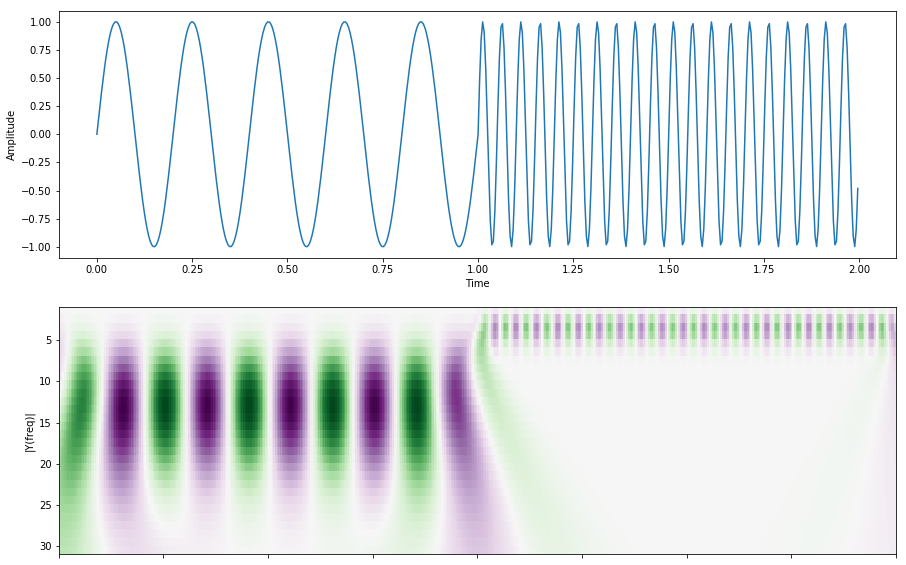

In [145]:
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(0, 2, 500, endpoint=False)

sig  = np.concatenate([np.sin(2*np.pi*ff*t[:len(t)//2]), 
               np.sin(8*np.pi*ff*t[:len(t)//2])])

widths = np.arange(1, 31)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
fig = plt.figure(figsize=(15, 10))

signal_plot = fig.add_subplot(211)
signal_plot.plot(t, sig)
signal_plot.set_xlabel('Time')
signal_plot.set_ylabel('Amplitude')
                 
wavelet_plot = fig.add_subplot(212)
wavelet_plot.imshow(cwtmatr, extent=[-1, 1, 31, 1], cmap='PRGn', aspect='auto',
          vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
wavelet_plot.set_ylabel('|Y(freq)|')
wavelet_plot.set_xticklabels([])

fig.savefig('wavelet01.png')
plt.show()

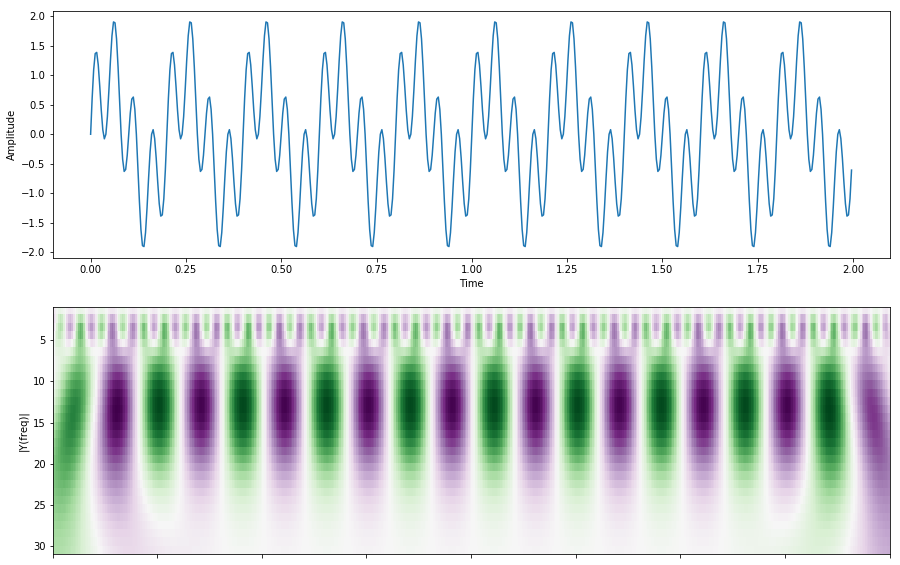

In [143]:
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(0, 2, 500, endpoint=False)

sig  = np.sin(2*np.pi*ff*t) + np.sin(8*np.pi*ff*t)

widths = np.arange(1, 31)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
fig = plt.figure(figsize=(15, 10))

signal_plot = fig.add_subplot(211)
signal_plot.plot(t, sig)
signal_plot.set_xlabel('Time')
signal_plot.set_ylabel('Amplitude')
                 
wavelet_plot = fig.add_subplot(212)
wavelet_plot.imshow(cwtmatr, extent=[-1, 1, 31, 1], cmap='PRGn', aspect='auto',
          vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
wavelet_plot.set_ylabel('|Y(freq)|')
wavelet_plot.set_xticklabels([])

fig.savefig('wavelet02.png')
plt.show()